In [1]:
import lightgbm
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
df_gsr_all = pd.read_csv(r"05 ECG-GSR Data\02 ECG-GSR (Features Extracted)\GSR_FeaturesExtracted.csv")
df_gsr_all.head()

,Quad_Cat,Mean,SD,Variance,Minimum,Maximum,Number of Peaks,Number of Valleys,Ratio
0,1,3.560146,0.139966,0.019591,3.317403,3.982484,0.000019,0.000019,5.300000e-11
1,0,5.567496,0.659287,0.434660,4.043869,7.146960,0.000036,0.000036,1.880000e-10
2,0,4.072888,0.530539,0.281472,2.393337,4.711197,0.000041,0.000041,2.820000e-10
3,3,5.407625,0.891521,0.794809,3.213556,7.700064,0.000041,0.000041,1.910000e-10
4,1,3.232517,0.159728,0.025513,2.973926,3.608285,0.000030,0.000030,8.350000e-11


GSR Data

Quad_Cat: Quadrant Category is a nominal categorical variable where 0= High Arousal High Valence, 1= Low Arousal High Valence, 2 = Low Arousal Low Valence, 3=High Arousal Low Valence

Mean:Mean of Skin Conductance level 

SD	:Standard Deviation of Skin Conductance level 

Variance:	Variance of Skin Conductance level 

Minimum	:Minimum value of Skin Conductance level 

Maximum	:Maximum value of Skin Conductance level 

Number of Peaks	:Number of local maxima per second  

Number of Valleys: Number of local minima per second 

Ratio: Ratio of peaks and time 


In [3]:
#Normalize data using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
df_gsr_drop = df_gsr_all.drop(['Quad_Cat'], axis=1)
names = df_gsr_drop.columns
fit = scaler.fit_transform(df_gsr_drop)
scaled_df = pd.DataFrame(fit, columns=names)

In [4]:
scaled_df.head()

,Mean,SD,Variance,Minimum,Maximum,Number of Peaks,Number of Valleys,Ratio
0,0.062865,0.031769,0.001240,0.059408,0.067751,0.236810,0.258367,0.095841
1,0.138215,0.163648,0.027806,0.089017,0.172199,0.445399,0.485944,0.339964
2,0.082112,0.130954,0.018001,0.021745,0.091803,0.504294,0.550201,0.509946
3,0.132214,0.222623,0.050858,0.055175,0.190456,0.509202,0.555556,0.345389
4,0.050567,0.036788,0.001619,0.045409,0.055400,0.371779,0.405622,0.150995


In [5]:
df_gsr = pd.concat([df_gsr_all['Quad_Cat'],scaled_df], axis = 1)
df_gsr.head()

,Quad_Cat,Mean,SD,Variance,Minimum,Maximum,Number of Peaks,Number of Valleys,Ratio
0,1,0.062865,0.031769,0.001240,0.059408,0.067751,0.236810,0.258367,0.095841
1,0,0.138215,0.163648,0.027806,0.089017,0.172199,0.445399,0.485944,0.339964
2,0,0.082112,0.130954,0.018001,0.021745,0.091803,0.504294,0.550201,0.509946
3,3,0.132214,0.222623,0.050858,0.055175,0.190456,0.509202,0.555556,0.345389
4,1,0.050567,0.036788,0.001619,0.045409,0.055400,0.371779,0.405622,0.150995


Add columns - Arousal and Valence to the dataframe.

if Quad_Cat is 0 - Arousal = 1, Valence = 1
if Quad_Cat is 1 - Arousal = 0, Valence = 1
if Quad_Cat is 2 - Arousal = 0, Valence = 0
if Quad_Cat is 3 - Arousal = 1, Valence = 0

In [6]:
#Read column names for X and y

df_gsr['Arousal'] = df_gsr['Quad_Cat'].apply(lambda x: 0 if ((x == 1) | (x == 2))  else 1)
df_gsr['Valence'] = df_gsr['Quad_Cat'].apply(lambda x: 0 if ((x == 2) | (x == 3))  else 1)

X_gsr = df_gsr[['Mean', 'SD', 'Variance','Minimum','Maximum', 'Number of Peaks', 'Number of Valleys','Ratio']]
y_gsr_quad = df_gsr['Quad_Cat']
y_gsr_ar = df_gsr['Arousal']
y_gsr_va = df_gsr['Valence']
df_gsr

,Quad_Cat,Mean,SD,Variance,Minimum,Maximum,Number of Peaks,Number of Valleys,Ratio,Arousal,Valence
0,1,0.062865,0.031769,0.001240,0.059408,0.067751,0.236810,0.258367,0.095841,0,1
1,0,0.138215,0.163648,0.027806,0.089017,0.172199,0.445399,0.485944,0.339964,1,1
2,0,0.082112,0.130954,0.018001,0.021745,0.091803,0.504294,0.550201,0.509946,1,1
3,3,0.132214,0.222623,0.050858,0.055175,0.190456,0.509202,0.555556,0.345389,1,0
4,1,0.050567,0.036788,0.001619,0.045409,0.055400,0.371779,0.405622,0.150995,0,1
...,...,...,...,...,...,...,...,...,...,...,...
307,2,0.470148,0.106420,0.012038,0.489424,0.460511,0.375460,0.350736,0.242315,0,0
308,0,0.610813,0.612954,0.377490,0.444839,0.662671,0.411043,0.448461,0.202532,1,1
309,1,0.357959,0.111497,0.013174,0.364487,0.344976,0.388957,0.467202,0.182640,0,1
310,3,0.372762,0.076092,0.006317,0.391586,0.355217,0.417178,0.544846,0.417722,1,0


In [7]:
from sklearn import metrics
from lightgbm import LGBMClassifier
from numpy import mean
from numpy import std
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc

gsr_quad = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8112, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

gsr_ar = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8112, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

gsr_va = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8112, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

def CrossValidation(X,y,classifier):
    accuracy = []

    cv = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
    cv.get_n_splits(X, y)

    for train, test in cv.split(X, y):
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]

        classifier.fit(X_train, y_train)
        feature = classifier.feature_importances_
        
        prediction = classifier.predict(X_test)
        score = metrics.accuracy_score(y_test, prediction)
        accuracy.append(score)
        
        report = metrics.classification_report(y_test, prediction,output_dict=True)
        precision =  report['macro avg']['precision'] 
        recall = report['macro avg']['recall']    
        f1 = report['macro avg']['f1-score']
        
        confusion_matrix = metrics.confusion_matrix(y_test, prediction)

    return accuracy, feature, precision, recall, f1, confusion_matrix

all_quad_accuracy, all_quad_feature, all_quad_precision, all_quad_recall, all_quad_f1, all_quad_cm = CrossValidation(X_gsr, y_gsr_quad, gsr_quad)
all_quad_accuracy_mean = (np.array(all_quad_accuracy).mean()) * 100
print("GSR 4-class accuracy: %.4f" % all_quad_accuracy_mean)
print("GSR 4-class precision: %.4f" % all_quad_precision)
print("GSR 4-class recall: %.4f" % all_quad_recall)
print("GSR 4-class F1: %.4f" % all_quad_f1)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 8
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [8]:
all_ar_accuracy, all_ar_feature, all_ar_precision, all_ar_recall, all_ar_f1, all_ar_cm = CrossValidation(X_gsr, y_gsr_ar, gsr_ar)
all_ar_accuracy_mean = (np.array(all_ar_accuracy).mean()) * 100

print("GSR Arousal accuracy: %.4f" % all_ar_accuracy_mean)
print("GSR Arousal precision: %.4f" % all_ar_precision)
print("GSR Arousal recall: %.4f" % all_ar_recall)
print("GSR Arousal F1: %.4f" % all_ar_f1)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 140, number of negative: 140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

In [9]:
all_va_accuracy, all_va_feature, all_va_precision, all_va_recall, all_va_f1, all_va_cm = CrossValidation(X_gsr, y_gsr_va, gsr_va)
all_va_accuracy_mean = (np.array(all_va_accuracy).mean()) * 100

print("GSR Valence accuracy: %.4f" % all_va_accuracy_mean)
print("GSR Valence precision: %.4f" % all_va_precision)
print("GSR Valence recall: %.4f" % all_va_recall)
print("GSR Valence F1: %.4f" % all_va_f1)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 140, number of negative: 140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

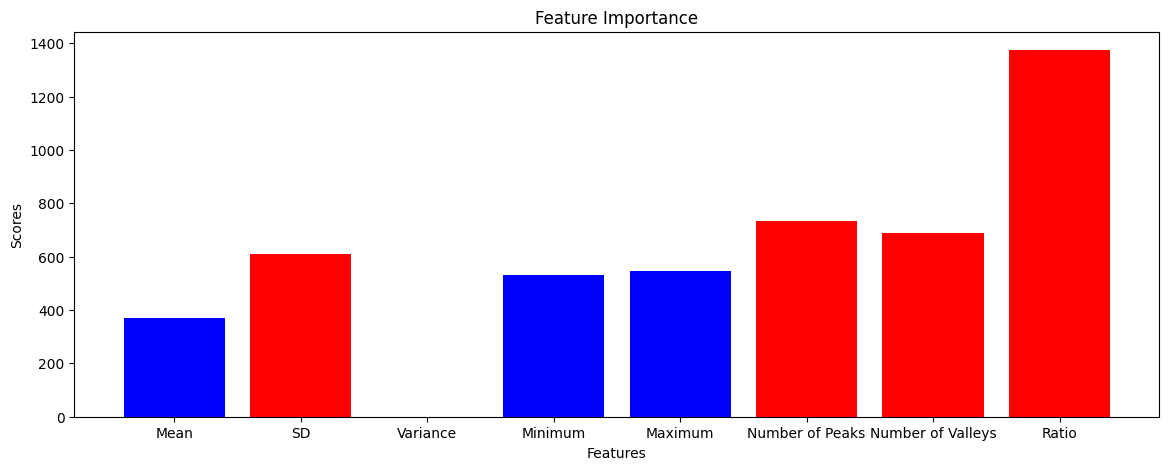

In [10]:
#Feature Importance graph plot for 4-class

plt.figure(1,figsize=(14,5))
column_names = scaled_df.columns
xaxis = column_names
clrs = ['blue' if (x < 600) else 'red' for x in all_quad_feature ]
plt.bar(xaxis, all_quad_feature, color = clrs)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.show()

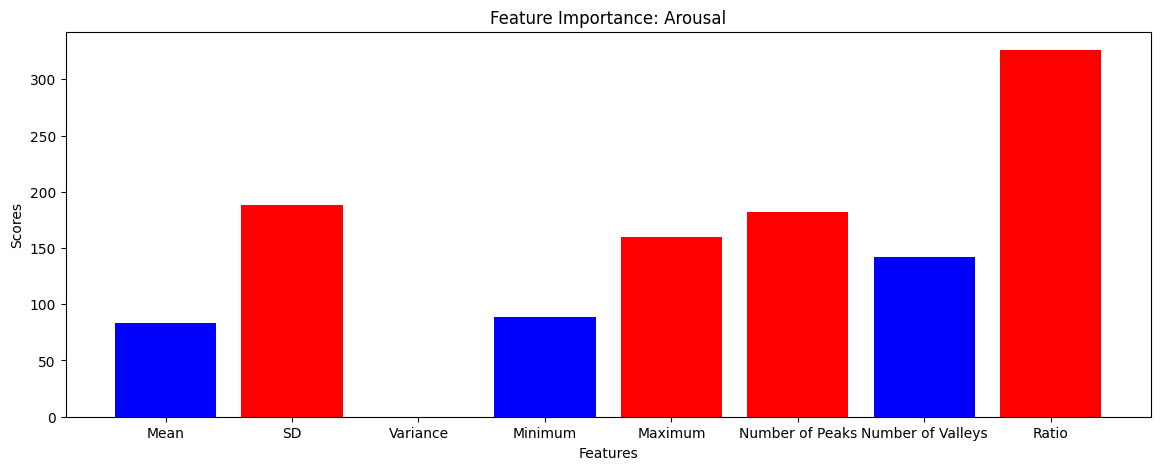

In [11]:
#Feature Importance graph plot for Arousal

plt.figure(1,figsize=(14,5))
xaxis = column_names
clrs = ['blue' if (x < 150) else 'red' for x in all_ar_feature ]
plt.bar(xaxis, all_ar_feature, color = clrs)
plt.title('Feature Importance: Arousal')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.show()

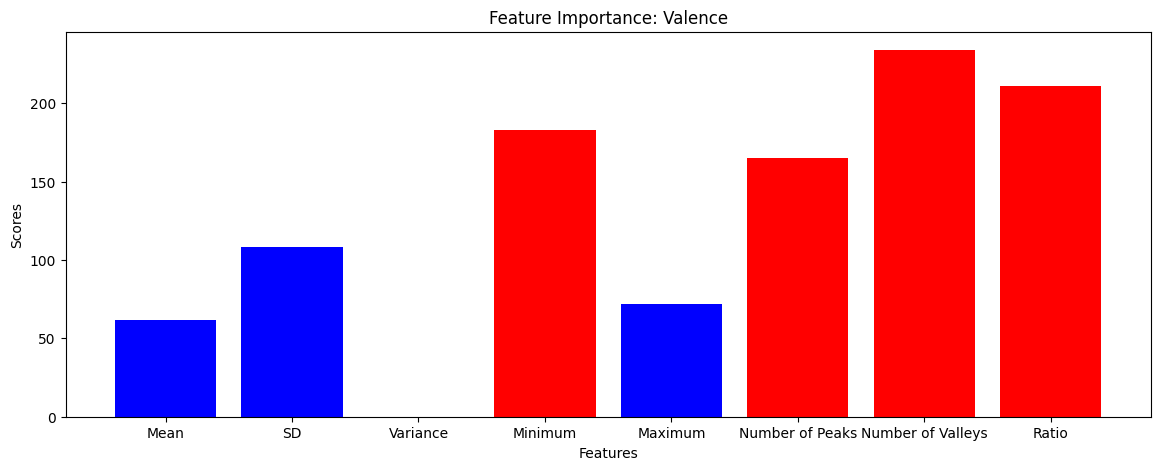

In [12]:
#Feature Importance graph plot for Valence

plt.figure(1,figsize=(14,5))
xaxis = column_names
clrs = ['blue' if (x < 150) else 'red' for x in all_va_feature ]
plt.bar(xaxis, all_va_feature, color = clrs)
plt.title('Feature Importance: Valence')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.show()

Using Logistic Regression to predict Arousal using Number of Peaks and Ratio, the top 2 most important features to predict Arousal.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Assuming the CSV and data are already loaded into df_gsr
# Extract the features (Ratio and Number of Peaks) and the target (Arousal)
X_gsr = df_gsr[['Number of Peaks', 'Ratio']]
y = y_gsr_ar  # Target variable (Arousal) should be correctly defined

# Scale the features to standardize them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_gsr)

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Output accuracy, precision, and recall
print(f'Overall Accuracy: {accuracy:.4f}')
print(f'Overall Precision: {precision:.4f}')
print(f'Overall Recall: {recall:.4f}')




Overall Accuracy: 0.8889
Overall Precision: 0.8969
Overall Recall: 0.8889


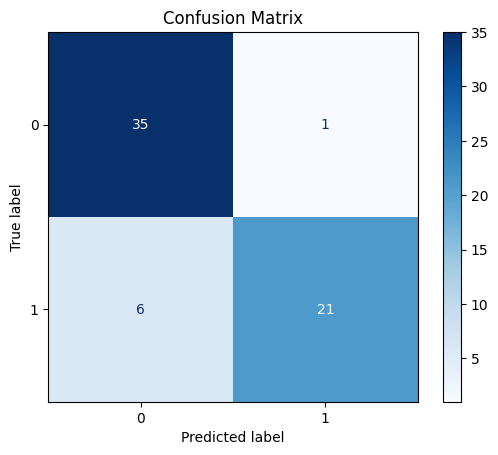

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix

cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


Using XGBoost to predict valence using Number of Valleys and Ratio, the top 2 most important features to predict Valence

In [15]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Select features and target variable
X = df_gsr[['Number of Valleys', 'Ratio']]
y = y_gsr_va

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R² Score: {r2:.4f}')


Mean Squared Error: 0.0784
R² Score: 0.6723
